<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Pre-processing-of-inut-data-to-allow-correct-selection-of-field-names-etc." data-toc-modified-id="0.-Pre-processing-of-inut-data-to-allow-correct-selection-of-field-names-etc.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>0. Pre-processing of inut data to allow correct selection of field names etc.</a></span></li></ul></div>

## 0. Pre-processing of inut data to allow correct selection of field names etc.

In [1]:
import os
import ipywidgets as widgets
import pandas as pd
import geopandas as gpd
import matplotlib
from shapely.geometry import Polygon
%matplotlib inline

pd.set_option("display.max_columns", 101)

In [2]:
test_data_name='ethan_3D'

test_data_path='../'+test_data_name+'/'

os.chdir(test_data_path)
%run -i "m2l_config.py"


Default parameters loaded from ../ethan_3D/m2l_config.py:
#ROI

step_out=0.1   #padding arounf dtm to ensure reprojected dtm covers target area (in degrees)
inset=0      #unused??

minx=968404  #region of interest coordinates in metre-based system (or non-degree system)
maxx=1066036
miny=7517796
maxy=7619000
model_top=1200
model_base=-8200

#PATHS

test_data_path='../ethan_3D/'
geology_file='geol_gda.shp'   #input geology file (if local)
fault_file='ethan_faults_gda.shp' #input fault file (if local)
structure_file='warox_ethan_gda.shp' #input bedding orientation file (if local)
m2m_cpp_path='../m2m_cpp/'


#CRS

src_crs = {'init': 'EPSG:4326'}  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
dst_crs = {'init': 'EPSG:28350'} # coordinate system for data

#codes and labels these refer to specific fields (codes) in GIS layer or database that contain the info needed for these calcs and text substrings (labels) in the contents of these fields
c_l= {
#Orientations
 

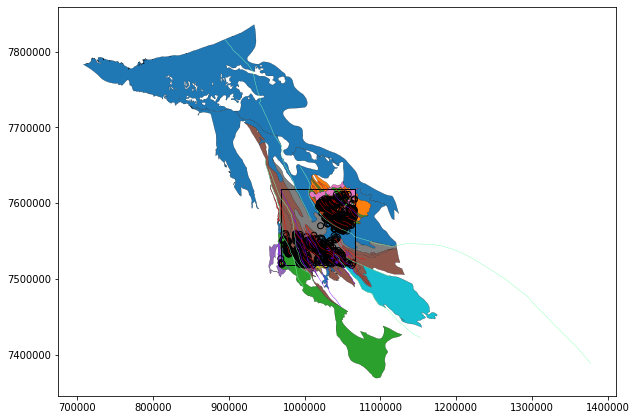

In [3]:
bbox=(minx,miny,maxx,maxy)
bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
lat_point_list = [miny, miny, maxy, maxy, maxy]
lon_point_list = [minx, maxx, maxx, minx, minx]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom]) 

geology = gpd.read_file(geology_file,bbox=bbox)
lines=gpd.read_file(fault_file,bbox=bbox)
structures = gpd.read_file(structure_file,bbox=bbox)

base=geology.plot(column=c_l['c'],figsize=(10,10),edgecolor='#000000',linewidth=0.2)
structures.plot(ax=base, color='none',edgecolor='black')
lines.plot(ax=base,cmap='rainbow',column=c_l['f'],figsize=(10,10),linewidth=0.4)
polygon.plot(ax=base, color='none',edgecolor='black')





In [4]:
display(geology.head(10))

,OBJECTID,LITHSTRTNO,CODE,UNITNAME,GSWASTATUS,RANK,DESCRIPTN,PARENTCODE,PARENTNAME,ROCKTYPE1,LITHNAME1,QUALIFIER1,QUALIFIER2,MIXEDROCK,ROCKTYPE2,LITHNAME2,MIXEDQUAL1,MIXEDQUAL2,WASTRAUNIT,SUPERSUITE,SUITE,SUPERGROUP,GROUP_,SUBGROUP,FORMATION,MEMBER,BED,STATE,WATECTUNIT,SSUITE_TEC,SUITE_TEC,CRATON,SUPERTERRA,CRATON_TER,DOMAIN_,GREENSTONE,SUPERBASIN,BASIN,SUBBASIN,SUBBASIN_E,OROGEN,PROVINCE,PROV_TZONE,TECT_SUBDI,OROG_FOR,OROG_FORSU,IN_OUTLIER,EVENTS,AGEFROM,AGETO,MAX_AGE_MA,MAXUNCERTY,MIN_AGE_MA,MINUNCERTY,MAX_AGE_DA,MIN_AGE_DA,EXTRACT_DA,Shape_Leng,Shape_Area,geometry
0,1735,1820,P_-LAm-stq,Malu Formation,Formal,Formation,Fine- to medium-grained quartz sandstone,P_-LA-xs-k,Lamil Group,sedimentary siliciclastic,sandstone,quartzose,None,None,None,None,None,None,None,None,None,None,Lamil Group,None,Malu Formation,None,None,Western Australia,Neoproterozoic basins,None,None,None,None,None,None,None,Centralian Superbasin,Yeneena Basin,None,None,Paterson Orogen,None,None,None,None,None,None,Alice Springs Orogeny (450 - 295 Ma); Peterman...,Neoproterozoic,Ediacaran,950,None,630,None,Inferred,Inferred,2016-06-30,0.487348,0.012546,"POLYGON ((1039147.581672756 7611108.31987403, ..."
1,2003,2486,K-_ca-sp,Callawa Formation,Formal,Formation,"Very fine-grained to coarse-grained sandstone,...",K-sz-CA,"Lower Cretaceous sedimentary rocks, Canning Basin",sedimentary siliciclastic,sandstone + conglomerate,None,None,None,None,None,None,None,None,None,None,None,None,None,Callawa Formation,None,None,Western Australia,Phanerozoic basins,None,None,None,None,None,None,None,Westralian Superbasin,Canning Basin; Roebuck Basin,None,None,None,None,None,None,None,None,None,Gondwana breakup - northern NW Shelf (320 - 13...,Lower Cretaceous,Lower Cretaceous,145,None,113,None,Inferred,Inferred,2016-06-30,22.441748,1.628001,"POLYGON ((720101.6999689983 7791273.368818445,..."
2,2088,4386,P_-_cr-g,Mount Crofton Granite,Formal,Formation,Syenogranite and monzogranite,TOL,_Top Of Litho-Stratigraphic Order,igneous granitic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mount Crofton Granite,None,None,Western Australia,None,None,None,None,None,None,None,None,None,None,None,None,Paterson Orogen,None,None,None,None,None,None,Alice Springs Orogeny (450 - 295 Ma); Peterman...,Neoproterozoic,Neoproterozoic,633,13,621,13,Isotopic,Isotopic,2016-06-30,0.319327,0.007633,"POLYGON ((1058293.339746526 7591715.952766161,..."
3,2251,1820,P_-LAm-stq,Malu Formation,Formal,Formation,Fine- to medium-grained quartz sandstone,P_-LA-xs-k,Lamil Group,sedimentary siliciclastic,sandstone,quartzose,None,None,None,None,None,None,None,None,None,None,Lamil Group,None,Malu Formation,None,None,Western Australia,Neoproterozoic basins,None,None,None,None,None,None,None,Centralian Superbasin,Yeneena Basin,None,None,Paterson Orogen,None,None,None,None,None,None,Alice Springs Orogeny (450 - 295 Ma); Peterman...,Neoproterozoic,Ediacaran,950,None,630,None,Inferred,Inferred,2016-06-30,0.240607,0.001711,"POLYGON ((1020526.491120143 7603137.644255737,..."
4,3135,4386,P_-_cr-g,Mount Crofton Granite,Formal,Formation,Syenogranite and monzogranite,TOL,_Top Of Litho-Stratigraphic Order,igneous granitic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mount Crofton Granite,None,None,Western Australia,None,None,None,None,None,None,None,None,None,None,None,None,Paterson Orogen,None,None,None,None,None,None,Alice Springs Orogeny (450 - 295 Ma); Peterman...,Neoproterozoic,Neoproterozoic,633,13,621,13,Isotopic,Isotopic,2016-06-30,0.122659,0.001118,"POLYGON ((1063404.065873149 7594570.188376927,..."
5,3225,2919,P_-LAw-stq,Wilki Formation,Formal,Formation,Fine- to medium-grained quartz sandstone; mino...,P_-LA-xs-k,Lamil Group,sedimentary siliciclastic,sandstone,quartzose,None,None,None,None,None,None,None,None,None,None,Lamil Group,None,Wilki Formation,None,None,Western Australia,Neoproterozoic basins,None,None,None,None,None,None,None,Centralian Superbasin,Yeneena Basin,None,

In [5]:
display(lines.head(10))

,OBJECTID,FEATURE,TYPE,NAME,CODE,DIP,DIP_EST,DIP_DIR,PLUNGE,PLUNGE_EST,PLUNGE_DIR,MAX_AGE_EV,MIN_AGE_EV,SYMBOL,EXTRACT_DA,Shape_Leng,geometry
0,151,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.110693,LINESTRING (1037200.987450157 7523986.47226606...
1,1057,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.600609,LINESTRING (1048040.762720002 7463108.28769101...
2,1359,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.012815,LINESTRING (1041502.948113846 7522314.64436389...
3,1789,Fault or shear zone,concealed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; concealed,2016-06-30,0.022439,LINESTRING (1038504.78434544 7536152.542589812...
4,1796,Fault or shear zone,concealed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; concealed,2016-06-30,0.233241,LINESTRING (1009734.872398972 7552268.51759894...
5,2253,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.018367,LINESTRING (1046071.883998612 7523295.32161146...
6,3161,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.008172,LINESTRING (1018909.907708042 7517840.50285659...
7,3244,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.008472,LINESTRING (1037589.869813717 7527162.28681163...
8,3258,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.008918,LINESTRING (1047492.039717322 7522095.42569320...
9,3408,Fault or shear zone,exposed,None,None,0,None,None,0,None,None,None,None,Fault or shear zone; exposed,2016-06-30,0.355242,LINESTRING (965855.0559764837 7546941.17178507...


In [6]:
display(structures.head(10))

,AREA,PERIMETER,GEOPNT_,GEOPNT_ID,FEATURE,TYPE,STRIKE,DIP_DIR,DIP,PLUNGE,TREND,RANK,VERGENCE,JNCODE,geometry
0,0.0,0.0,4,4,"Bedding, showing strike and dip",overturned,134,44,65,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (990297.8366821175 7551636.597198675)
1,0.0,0.0,5,5,"Bedding, showing strike and dip",overturned,145,55,75,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (996261.6983300894 7542767.652345687)
2,0.0,0.0,6,6,"Bedding, showing strike and dip",overturned,151,61,75,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (999300.5053941661 7543549.548965896)
3,0.0,0.0,7,7,"Bedding, showing strike and dip",overturned,149,59,75,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (997510.5597616336 7541116.072565404)
4,0.0,0.0,8,8,"Bedding, showing strike and dip",overturned,160,70,65,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (987809.3588291195 7537244.850312882)
5,0.0,0.0,9,9,"Bedding, showing strike and dip",overturned,165,75,70,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (992331.7352470311 7532274.978417195)
6,0.0,0.0,10,10,"Bedding, showing strike and dip",overturned,150,60,80,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (1002215.080181466 7536059.641248037)
7,0.0,0.0,11,11,"Bedding, showing strike and dip",overturned,153,63,75,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (997396.4290937777 7536112.829367582)
8,0.0,0.0,12,12,"Bedding, showing strike and dip",overturned,147,57,55,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (992221.7042366476 7525807.45661245)
9,0.0,0.0,13,13,"Bedding, showing strike and dip",overturned,125,35,75,0,0,0,None,"f5110;Bedding, showing strike and dip;overturned",POINT (1004921.333385446 7527519.290828066)


In [7]:
layer=geology

In [8]:
w=widgets.ToggleButtons(
    options=list(layer.columns.values),
    description='Field:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)


In [9]:
display(w)

s=widgets.ToggleButtons(
    options=list(geology[w.value].values),
    description='Unique Values:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)


ToggleButtons(description='Field:', options=('OBJECTID', 'LITHSTRTNO', 'CODE', 'UNITNAME', 'GSWASTATUS', 'RANK…

In [10]:
display(s)
print(s.value)

ToggleButtons(description='Unique Values:', options=(1735, 2003, 2088, 2251, 3135, 3225, 3227, 3228, 3229, 323…

1735
